In [1]:
# Import libraries
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
performance = pd.read_csv('/Users/mahindr/UTOR-VIRT-DATA-PT-02-2024-U-LOLC/Final Project/StudentsPerformance_with_headers.csv', encoding='ISO-8859-1', low_memory=False)
performance.head()

,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,ReadingScientific,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,2,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,1,2,1,2,2,2,1


In [4]:
# Define the file path
path = Path('/Users/mahindr/UTOR-VIRT-DATA-PT-02-2024-U-LOLC/Final Project/StudentsPerformance_with_headers.csv')

# Read the CSV file into DataFrame
master_df = pd.read_csv(path)

master_df

,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,ReadingScientific,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,2,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,2,1,1,1,1,1,2,1,2,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,2,2,1,2,1,1,3,2,2,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,2,1,1,1,1,1,3,3,2,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,1,1,1,2,1,2,1,2,4


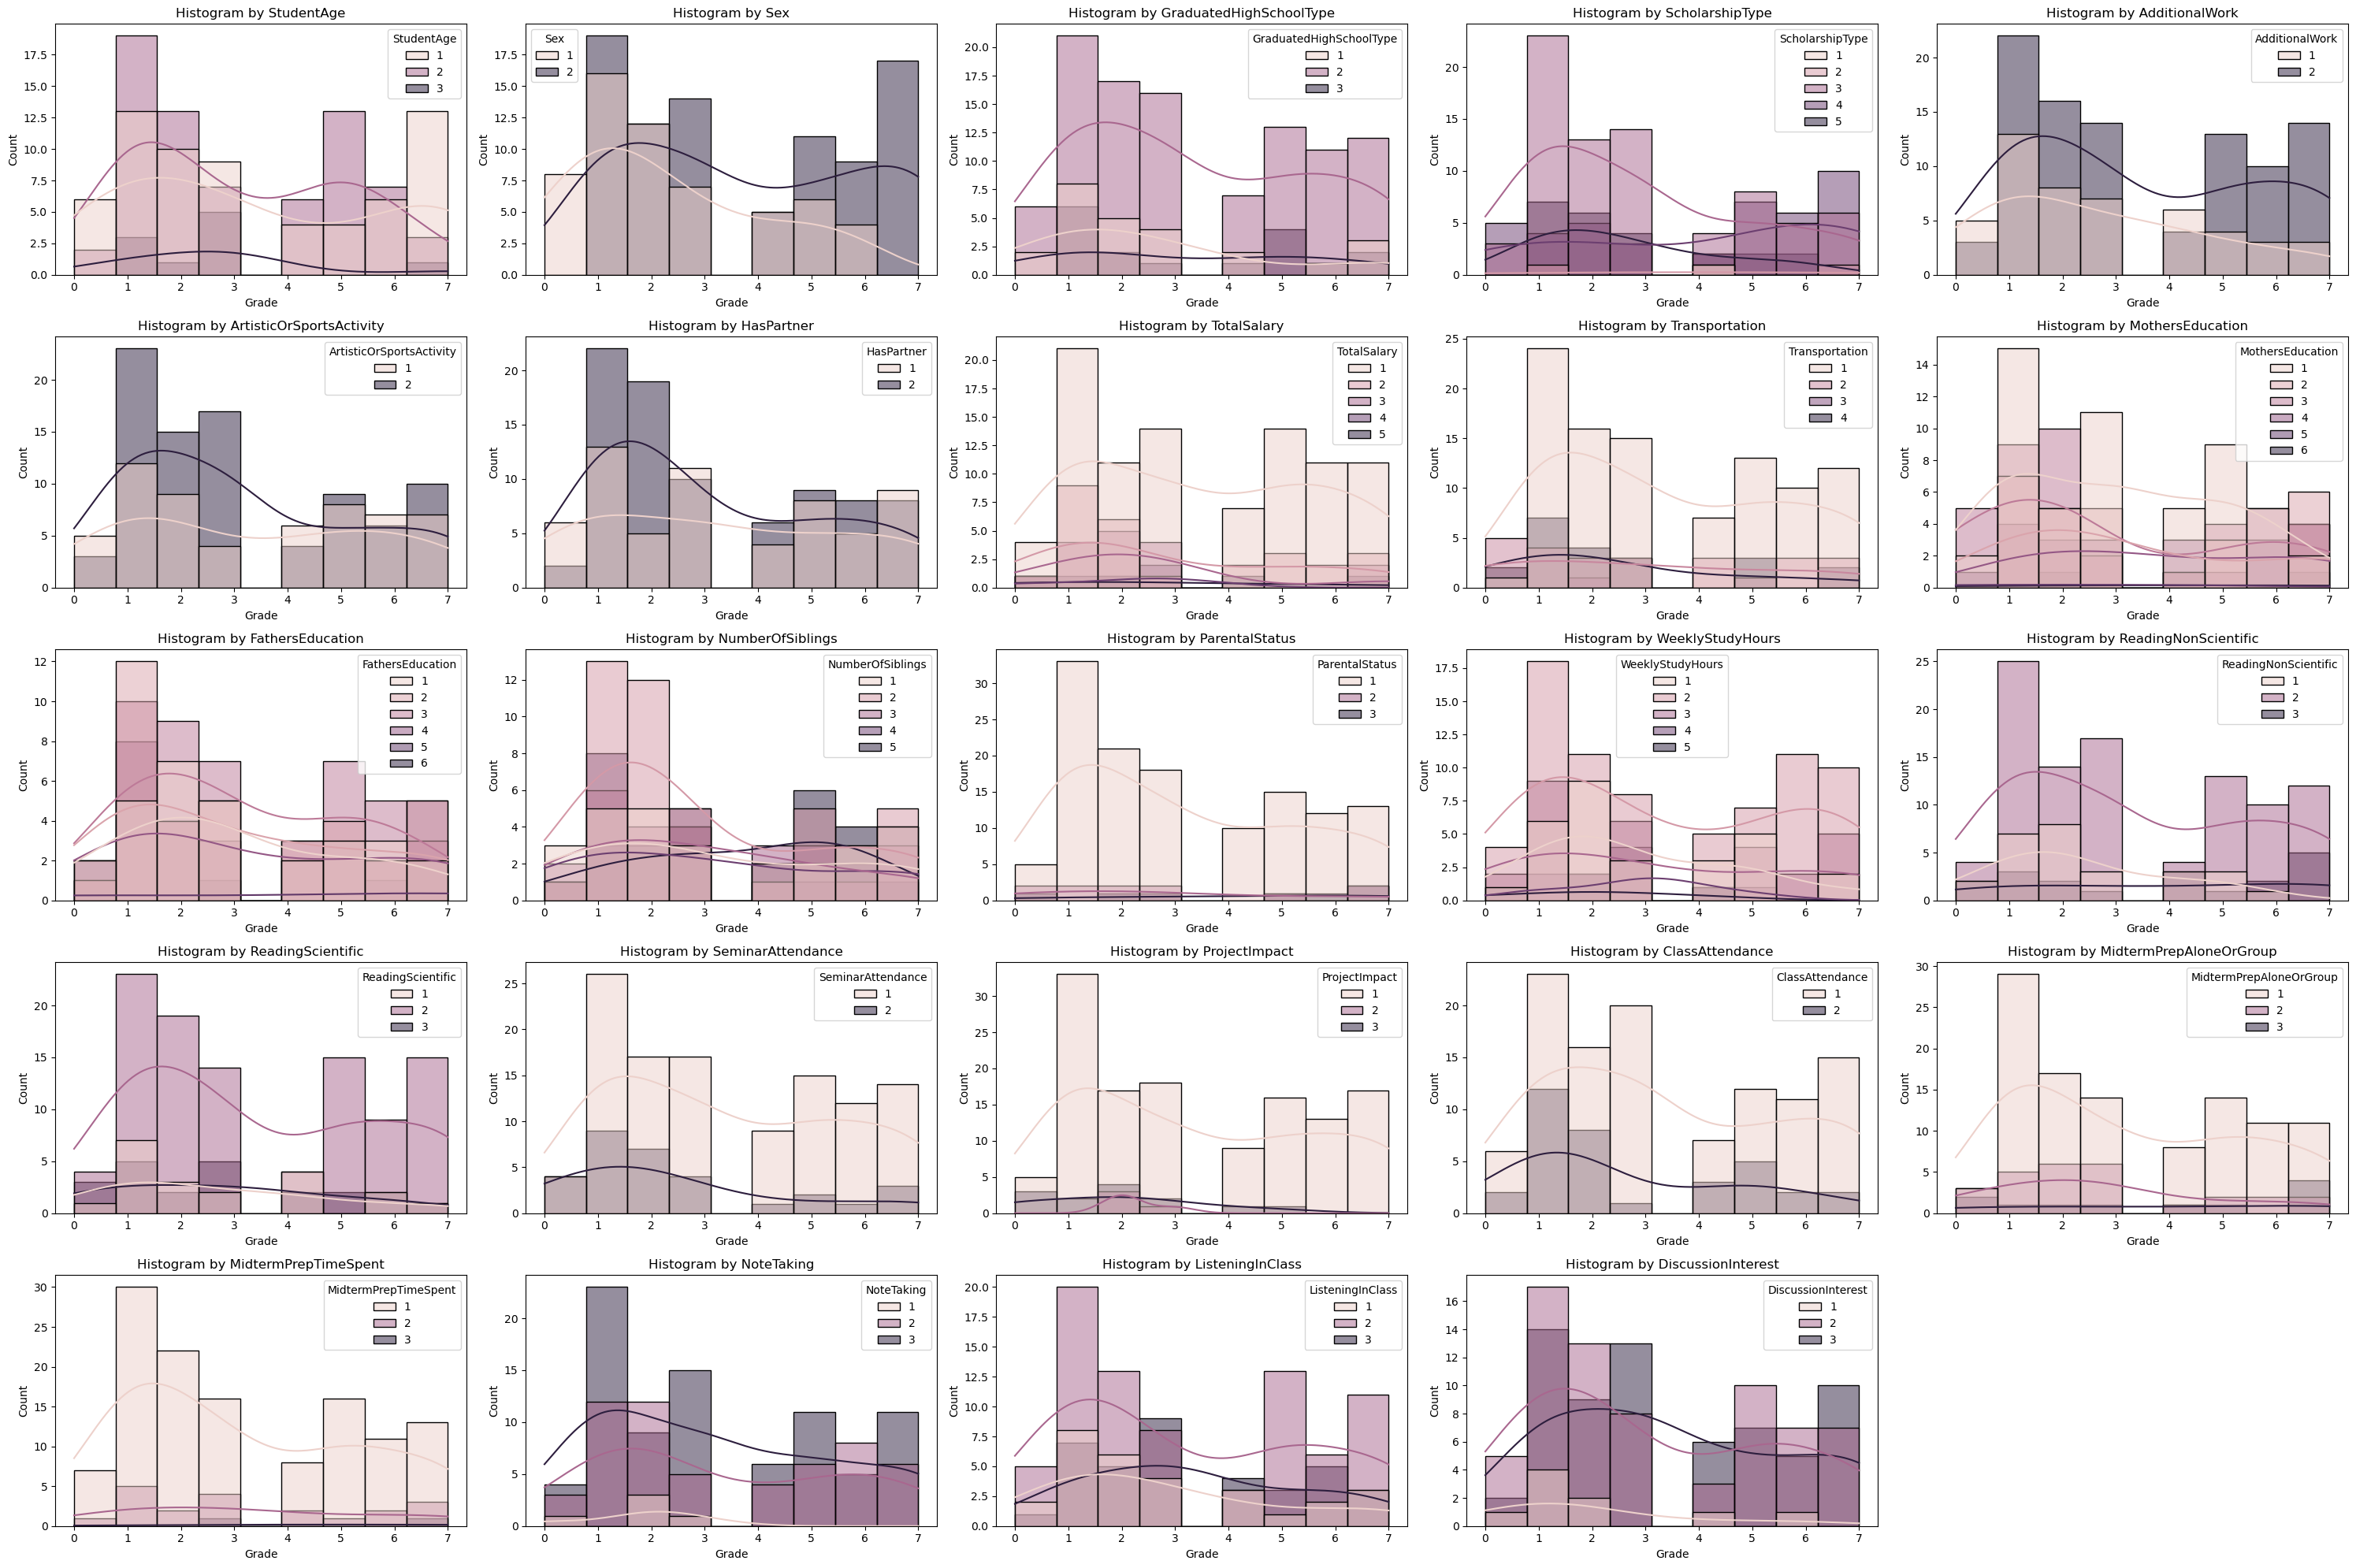

In [5]:
# Define the column to use as the x-axis value
x_column = 'Grade'

# Define the columns to exclude 
exclude_columns = [x_column, 'StudentID']

# Define the columns to use as hue 
columns = [col for col in master_df.columns if col not in exclude_columns]

# Calculate number of subplots
num_columns = len(columns)
num_rows = (num_columns // 5) + (num_columns % 5 != 0)  # Calculate rows needed


# Set up the figure
plt.figure(figsize=(30, 20))

# Iterate over hue columns and create subplots
for i, hue_column in enumerate(columns):
    plt.subplot(num_rows, 5, i + 1)
    # Plot histogram with hue
    ax = sns.histplot(master_df, x=x_column, hue=hue_column, kde=True, alpha=0.5)
    plt.title(f'Histogram by {hue_column}')
    
    # Explicitly handle legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles=handles, labels=labels, title=hue_column)

plt.tight_layout()
plt.show()

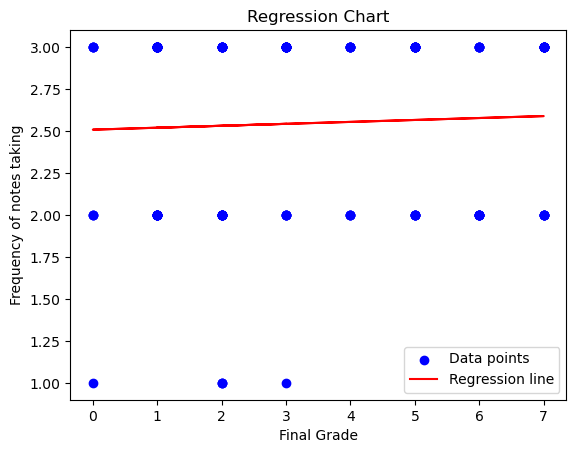

In [6]:
#Run regression on taking notes in class and Final Grades

X = master_df['Grade'].values.reshape(-1, 1)  
y = master_df['NoteTaking'].values 

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

# Plot the data points (scatter plot)
plt.scatter(master_df['Grade'], master_df['NoteTaking'], color='blue', label='Data points')

# Plot the regression line
plt.plot(master_df['Grade'], y_pred, color='red', label='Regression line')

# Add title and labels
plt.title('Regression Chart')
plt.xlabel('Final Grade')
plt.ylabel('Frequency of notes taking')
plt.legend()

# Show the plot
plt.show()

In [7]:
# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
master_df['Grade_Label'] = master_df['Grade'].map(grade_mapping)
master_df

,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade,Grade_Label
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,1,1,1,3,2,1,1,DD
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,1,1,1,3,2,3,1,DD
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,1,1,1,2,2,1,1,DD
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,1,1,1,2,3,2,2,1,DD
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,2,1,2,2,2,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,1,1,1,2,1,2,5,BB
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,2,1,2,1,1,3,2,2,5,BB
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,1,1,1,3,3,2,1,DD
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,1,1,2,1,2,1,2,4,CB


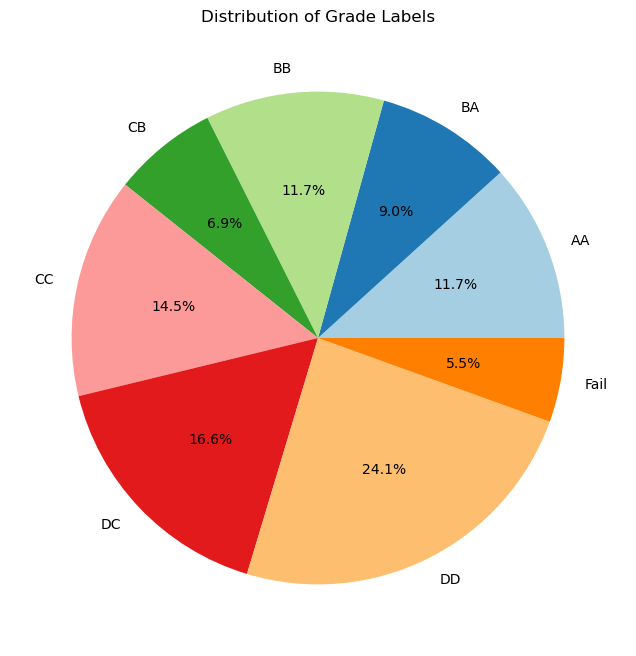

In [8]:
# Get the count of each grade label
grade_counts = master_df['Grade_Label'].value_counts()

# Define the desired order
grade_order = ['AA', 'BA', 'BB', 'CB', 'CC', 'DC', 'DD', 'Fail']

# Reorder the counts according to the defined order
ordered_grade_counts = grade_counts.reindex(grade_order, fill_value=0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ordered_grade_counts, labels=ordered_grade_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(ordered_grade_counts))))

# Add title
plt.title('Distribution of Grade Labels')

# Show the plot
plt.show()